# Chicago Crime
- *David Atkins*

## Part 1

### Imports / Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.ticker as mticks
import holidays
import datetime as dt
from holidays import country_holidays
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.makedirs('data/', exist_ok=True)
os.listdir("data/")

['Chicago-Crime_2001.csv',
 'Chicago-Crime_2002.csv',
 'Chicago-Crime_2003.csv',
 'Chicago-Crime_2004.csv',
 'Chicago-Crime_2005.csv',
 'Chicago-Crime_2006.csv',
 'Chicago-Crime_2007.csv',
 'Chicago-Crime_2008.csv',
 'Chicago-Crime_2009.csv',
 'Chicago-Crime_2010.csv',
 'Chicago-Crime_2011.csv',
 'Chicago-Crime_2012.csv',
 'Chicago-Crime_2013.csv',
 'Chicago-Crime_2014.csv',
 'Chicago-Crime_2015.csv',
 'Chicago-Crime_2016.csv',
 'Chicago-Crime_2017.csv',
 'Chicago-Crime_2018.csv',
 'Chicago-Crime_2019.csv',
 'Chicago-Crime_2020.csv',
 'Chicago-Crime_2021.csv',
 'Chicago-Crime_2022.csv']

In [3]:
temp_files = sorted(glob.glob("data/Chicago-Crime_*.csv"))
temp_files

['data\\Chicago-Crime_2001.csv',
 'data\\Chicago-Crime_2002.csv',
 'data\\Chicago-Crime_2003.csv',
 'data\\Chicago-Crime_2004.csv',
 'data\\Chicago-Crime_2005.csv',
 'data\\Chicago-Crime_2006.csv',
 'data\\Chicago-Crime_2007.csv',
 'data\\Chicago-Crime_2008.csv',
 'data\\Chicago-Crime_2009.csv',
 'data\\Chicago-Crime_2010.csv',
 'data\\Chicago-Crime_2011.csv',
 'data\\Chicago-Crime_2012.csv',
 'data\\Chicago-Crime_2013.csv',
 'data\\Chicago-Crime_2014.csv',
 'data\\Chicago-Crime_2015.csv',
 'data\\Chicago-Crime_2016.csv',
 'data\\Chicago-Crime_2017.csv',
 'data\\Chicago-Crime_2018.csv',
 'data\\Chicago-Crime_2019.csv',
 'data\\Chicago-Crime_2020.csv',
 'data\\Chicago-Crime_2021.csv',
 'data\\Chicago-Crime_2022.csv']

In [4]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in temp_files] )
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [5]:
ts = df
ts['Date'] = pd.to_datetime(ts['Date'], format='%m/%d/%Y %H:%M:%S %p')
ts = df.set_index('Date')
ts.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [6]:
holidays = country_holidays('US', subdiv='IL')
ts['Holiday'] = [holidays.get(day) for day in ts.index]
ts.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Holiday
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,New Year's Day
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,New Year's Day
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,New Year's Day
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,New Year's Day
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,New Year's Day


In [7]:
ts['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [8]:
ts['Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Casimir Pulaski Day                                19128
Lincoln's Birthday                                 18165
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Election Day                                        6342
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Lincoln's Birthday (Observed)                       5156
Christmas Day (Observed)                            4929
New Year's Day (Observed)      

### Stakeholder Questions

##### 1. Comparing Police Districts- 
Which district had the most crimes in 2022?

- 
Which had the least?

In [9]:
ts1 = ts.copy()
ts1 = ts1.drop(columns=["ID","Primary Type","Description","Location Description","Arrest","Domestic","Beat","Ward","Latitude","Longitude","Holiday"])
ts1 = ts1[ts1.index > '2021-12-31 23:59:59']
ts1.head()

,District
Date,
2022-01-01 01:00:00,1.0
2022-01-01 01:00:00,8.0
2022-01-01 01:00:00,5.0
2022-01-01 01:00:00,4.0
2022-01-01 01:00:00,18.0


In [10]:
ts1.value_counts()

District
8.0         14805
6.0         14694
12.0        14341
4.0         13931
11.0        13457
1.0         13044
18.0        12429
19.0        12243
25.0        11951
3.0         11937
2.0         11793
9.0         10376
7.0         10319
10.0         9961
5.0          9773
16.0         9226
24.0         8469
15.0         8308
14.0         8158
22.0         7671
17.0         6997
20.0         4960
31.0           15
dtype: int64

In [11]:
ts1 = ts1.groupby('District').resample('Y').count()
ts1

,,District
District,Date,
1.0,2022-12-31,13044
2.0,2022-12-31,11793
3.0,2022-12-31,11937
4.0,2022-12-31,13931
5.0,2022-12-31,9773
6.0,2022-12-31,14694
7.0,2022-12-31,10319
8.0,2022-12-31,14805
9.0,2022-12-31,10376


In [12]:
print(ts1['District'].max())
print(ts1['District'].min())

14805
15


In [13]:
unstacked=ts1.unstack(level=1)
unstacked.head()

,District
Date,2022-12-31
District,
1.0,13044
2.0,11793
3.0,11937
4.0,13931
5.0,9773


In [14]:
unstacked

,District
Date,2022-12-31
District,
1.0,13044
2.0,11793
3.0,11937
4.0,13931
5.0,9773
6.0,14694
7.0,10319
8.0,14805


- District 8 had the most crimes in 2022 at 14,805.

- District 31 had the least with 15.

##### 2. Comparing Months
- What months have the most crime? What months have the least?

- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [15]:
ts2 = ts.copy()
ts2 = ts2.drop(columns=["ID","Description","Location Description","Arrest","Domestic","Beat","Ward","District","Latitude","Longitude","Holiday"])
ts2.head()

,Primary Type
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,BATTERY


In [16]:
ts2.info

<bound method DataFrame.info of                            Primary Type
Date                                   
2001-01-01 01:00:00             BATTERY
2001-01-01 01:00:00             BATTERY
2001-01-01 01:00:00            GAMBLING
2001-01-01 01:00:00     CRIMINAL DAMAGE
2001-01-01 01:00:00             BATTERY
...                                 ...
2022-12-31 12:50:00             ASSAULT
2022-12-31 12:50:00             ASSAULT
2022-12-31 12:52:00             BATTERY
2022-12-31 12:52:00             ASSAULT
2022-12-31 12:59:00  DECEPTIVE PRACTICE

[7713109 rows x 1 columns]>

In [17]:
set = range(0, 7713109)
ts2['Month'] = ts2.index[set].month
ts2['Month'].value_counts()

7     717232
8     710444
5     682932
6     681739
10    676285
9     668242
3     629704
4     627175
11    608961
1     601236
12    579768
2     529391
Name: Month, dtype: int64

In [18]:
ts2

,Primary Type,Month
Date,,
2001-01-01 01:00:00,BATTERY,1
2001-01-01 01:00:00,BATTERY,1
2001-01-01 01:00:00,GAMBLING,1
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
2001-01-01 01:00:00,BATTERY,1
...,...,...
2022-12-31 12:50:00,ASSAULT,12
2022-12-31 12:50:00,ASSAULT,12
2022-12-31 12:52:00,BATTERY,12


In [19]:
ts2.columns

Index(['Primary Type', 'Month'], dtype='object')

In [20]:
m_totals = ts2.groupby('Month').count()
m_totals

,Primary Type
Month,
1,601236
2,529391
3,629704
4,627175
5,682932
6,681739
7,717232
8,710444
9,668242


In [21]:
m_verbose = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [22]:
m_totals['Month2'] = m_verbose
m_totals.head()

,Primary Type,Month2
Month,,
1,601236,January
2,529391,February
3,629704,March
4,627175,April
5,682932,May


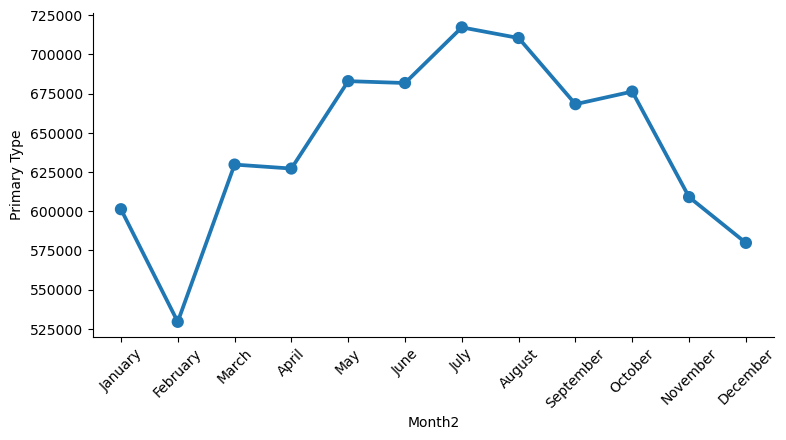

In [23]:
ax = sns.catplot(m_totals, x='Month2', y='Primary Type', kind="point", aspect=2, height = 4);
ax.set_xticklabels(rotation=45);

- **December, January, and February are the lowest crime months.**

- **May, July, and August are the highest crime months.**

In [24]:
temp = ts2
ts2

,Primary Type,Month
Date,,
2001-01-01 01:00:00,BATTERY,1
2001-01-01 01:00:00,BATTERY,1
2001-01-01 01:00:00,GAMBLING,1
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
2001-01-01 01:00:00,BATTERY,1
...,...,...
2022-12-31 12:50:00,ASSAULT,12
2022-12-31 12:50:00,ASSAULT,12
2022-12-31 12:52:00,BATTERY,12


In [25]:
c_totals = ts2.groupby('Primary Type').value_counts().sort_index()
c_totals

Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Length: 415, dtype: int64

In [26]:
c_totals = c_totals.to_frame('Crime').reset_index()
c_totals

,Primary Type,Month,Crime
0,ARSON,1,917
1,ARSON,2,807
2,ARSON,3,1111
3,ARSON,4,1097
4,ARSON,5,1230
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


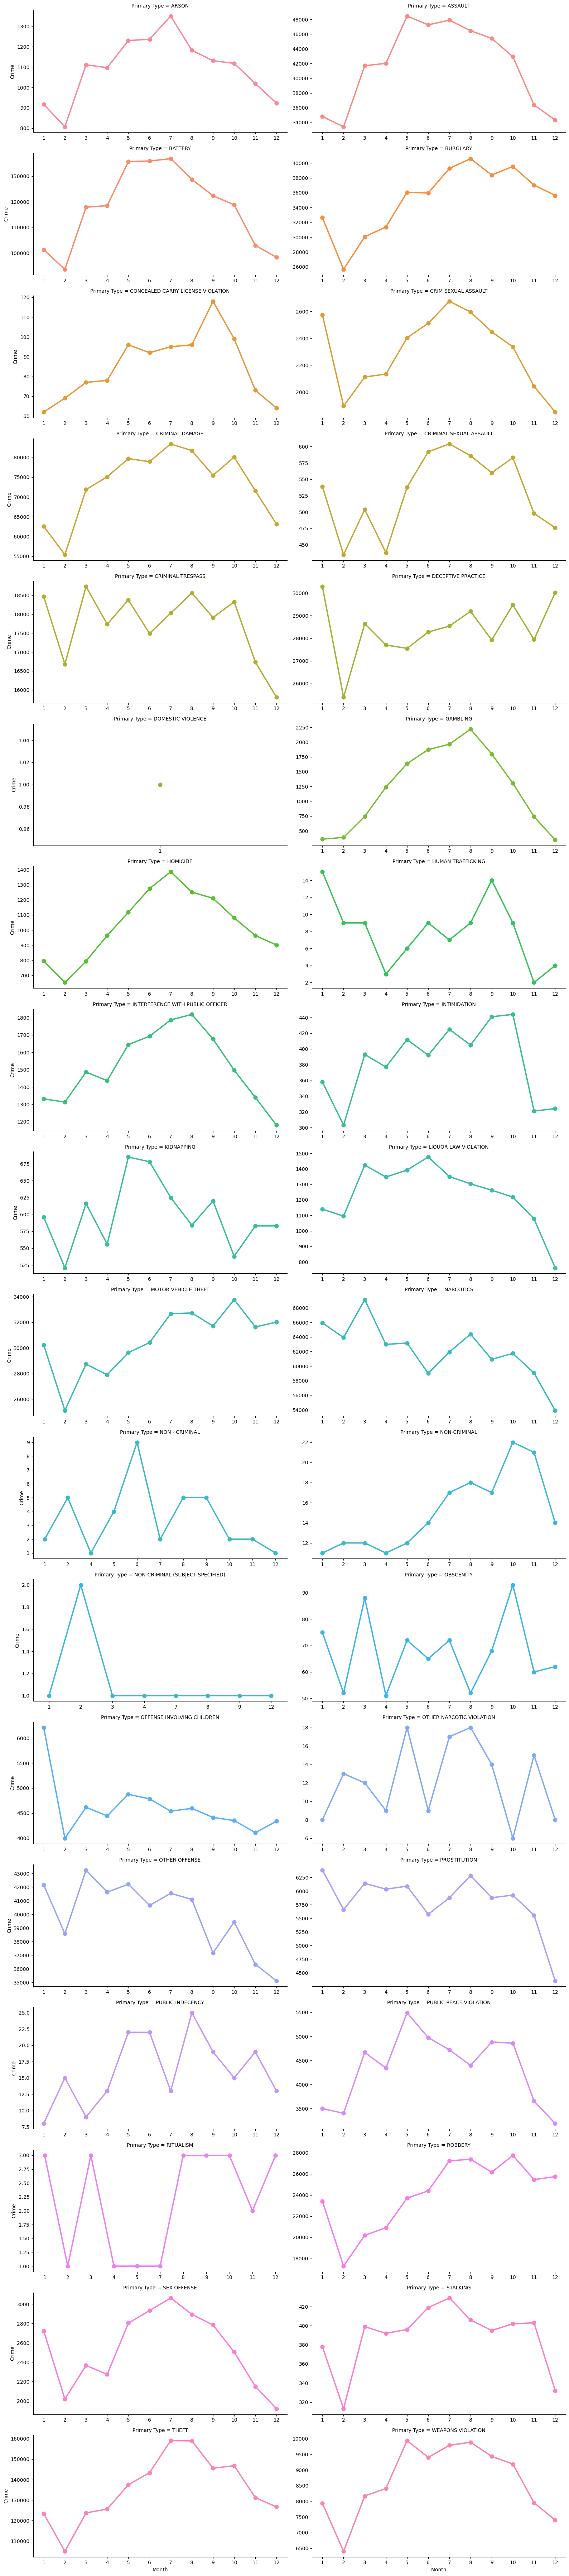

In [27]:
g = sns.catplot(data = c_totals, x = 'Month', y = 'Crime', kind = 'point', aspect=2, height = 4, hue = 'Primary Type',
               col = 'Primary Type', col_wrap = 2, sharey = False, sharex = False);

- **December, January, and February are the lowest crime months.**

- **May, July, and August are the highest crime months.**

- **Human Trafficking does not match the other crimes' seasonality.**

- **Narcotics and Liquor Law Violations do not spike up in the summer, instead peaking in spring and gradually decending through a December low.**

- **We do not have enough domestic violence crimes to have an accurate chart.**

- **The Non-Criminal categories also do not follow the seasonal pattern.**
 art

##### 3. Comparing Holidays
- What are the top 3 holidays with the largest number of crimes?

- For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [28]:
hol = ['Primary Type','Holiday']
ts3 = ts[hol].copy()
ts3 = ts3.dropna()
ts3

,Primary Type,Holiday
Date,,
2001-01-01 01:00:00,BATTERY,New Year's Day
2001-01-01 01:00:00,BATTERY,New Year's Day
2001-01-01 01:00:00,GAMBLING,New Year's Day
2001-01-01 01:00:00,CRIMINAL DAMAGE,New Year's Day
2001-01-01 01:00:00,BATTERY,New Year's Day
...,...,...
2022-12-26 12:40:00,THEFT,Christmas Day (Observed)
2022-12-26 12:41:00,ASSAULT,Christmas Day (Observed)
2022-12-26 12:44:00,BATTERY,Christmas Day (Observed)


In [29]:
htotal = ts3.groupby('Holiday').count().sort_values('Primary Type', ascending=False)
htotal[:3]

,Primary Type
Holiday,
New Year's Day,32725
Independence Day,22672
Labor Day,22164


In [30]:
top = ["New Year's Day",'Independence Day','Labor Day']
hcrime = ts3[ts3['Holiday'].isin(top)].groupby('Holiday').value_counts().sort_index()
hcrime

Holiday           Primary Type                     
Independence Day  ARSON                                  59
                  ASSAULT                              1547
                  BATTERY                              5805
                  BURGLARY                             1080
                  CONCEALED CARRY LICENSE VIOLATION       4
                                                       ... 
New Year's Day    ROBBERY                               765
                  SEX OFFENSE                           900
                  STALKING                               21
                  THEFT                                6845
                  WEAPONS VIOLATION                     831
Length: 87, dtype: int64

In [31]:
hcrime = hcrime.to_frame('Crimes').reset_index()
hcrime

,Holiday,Primary Type,Crimes
0,Independence Day,ARSON,59
1,Independence Day,ASSAULT,1547
2,Independence Day,BATTERY,5805
3,Independence Day,BURGLARY,1080
4,Independence Day,CONCEALED CARRY LICENSE VIOLATION,4
...,...,...,...
82,New Year's Day,ROBBERY,765
83,New Year's Day,SEX OFFENSE,900
84,New Year's Day,STALKING,21
85,New Year's Day,THEFT,6845


In [32]:
NYD = hcrime[hcrime['Holiday'] == "New Year's Day"].sort_values('Primary Type', ascending=False)
NYD[:5]

,Holiday,Primary Type,Crimes
86,New Year's Day,WEAPONS VIOLATION,831
85,New Year's Day,THEFT,6845
84,New Year's Day,STALKING,21
83,New Year's Day,SEX OFFENSE,900
82,New Year's Day,ROBBERY,765


In [33]:
IDD = hcrime[hcrime['Holiday'] == 'Independence Day'].sort_values('Primary Type', ascending=False)
IDD[:5]

,Holiday,Primary Type,Crimes
28,Independence Day,WEAPONS VIOLATION,448
27,Independence Day,THEFT,4074
26,Independence Day,STALKING,13
25,Independence Day,SEX OFFENSE,92
24,Independence Day,ROBBERY,770


In [34]:
LBD = hcrime[hcrime['Holiday'] == 'Labor Day'].sort_values('Primary Type', ascending=False)
LBD[:5]

,Holiday,Primary Type,Crimes
57,Labor Day,WEAPONS VIOLATION,374
56,Labor Day,THEFT,4520
55,Labor Day,STALKING,13
54,Labor Day,SEX OFFENSE,116
53,Labor Day,ROBBERY,830


- **The 3 holidays with the most crime are New Year's Day, Independance Day, and Labor Day.**

- **The 5 most common crimes on each of these holidays are, in order, Weapons Violation, Theft, Stalking, Sex Offense, and Robbery.**

## Part 2 - Crime Forecasts

### Functions

In [35]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [36]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

In [37]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [38]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

### Theft

#### Data Prep

In [39]:
# updating imports
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
import itertools
import pmdarima as pm

plt.rcParams['figure.figsize']=(12,3)

In [40]:
ts.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Holiday
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,New Year's Day
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,New Year's Day
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,New Year's Day
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,New Year's Day
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,New Year's Day


In [41]:
theft = ts[ts['Primary Type'] == 'THEFT'].drop(columns=["ID","Description","Location Description","Arrest","Domestic","Beat","District","Ward","Latitude","Longitude","Holiday"])
theft.head()

,Primary Type
Date,
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,THEFT


In [42]:
theft.isna().sum()

Primary Type    0
dtype: int64

In [43]:
theft = theft.resample('M').size()
theft

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2022-08-31    5244
2022-09-30    5117
2022-10-31    5242
2022-11-30    4717
2022-12-31    4413
Freq: M, Length: 264, dtype: int64

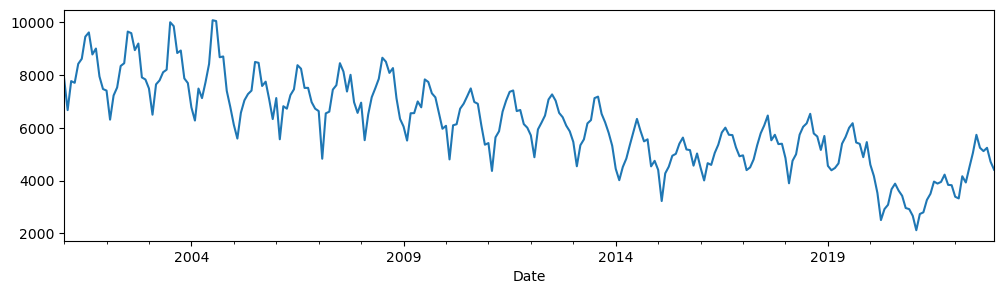

In [44]:
theft.plot();

#### Seasonality

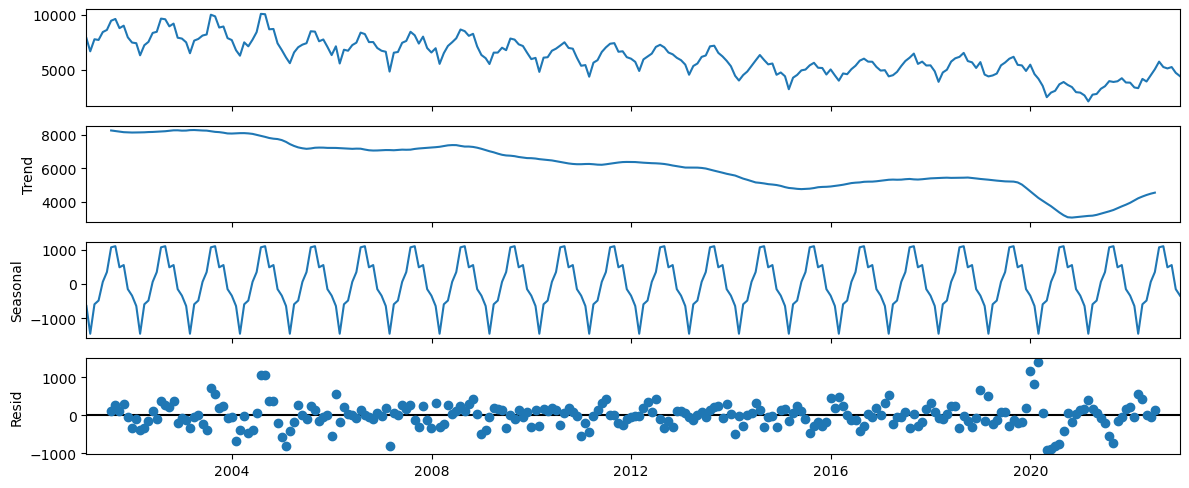

In [45]:
decomp = tsa.seasonal_decompose(theft)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [46]:
tmax = theft.max()
tmin = theft.min()
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
tper = seasonal_delta/(tmax-tmin) * 100

print(f"The seasonal component is {seasonal_delta} which is ~{tper:.2f}% of the variation in time series.")

The seasonal component is 2549.9880952380954 which is ~32.08% of the variation in time series.


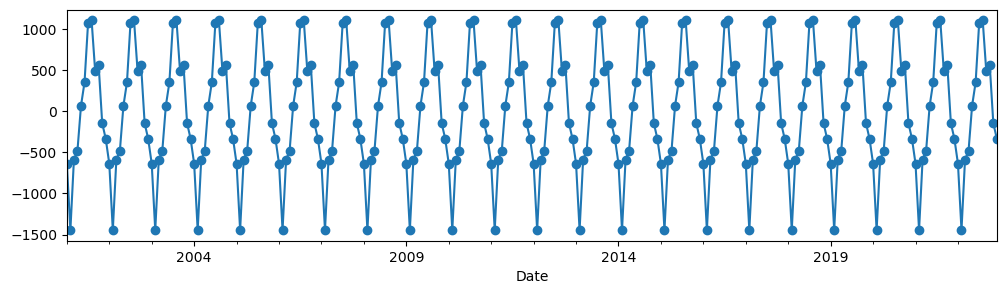

In [47]:
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

#### Model Order

In [48]:
# determine d
d = ndiffs(theft)
print (f'd = {d}')
# Determine D
D = nsdiffs(theft, m =12)
print(f'D = {D}')

d = 1
D = 0


In [49]:
theft_diff = theft.diff().dropna()

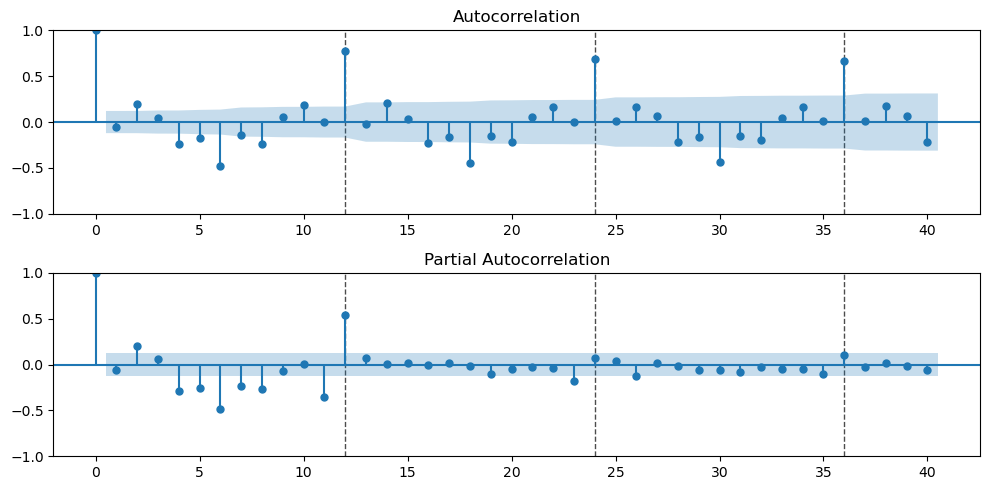

In [50]:
plot_acf_pacf(theft_diff, annotate_seas=True, m = 12);

Due to the sharp drop after lag 1 on both I will start with a (1,1,1)(1,0,1,12) model

In [51]:
theft.shape

(264,)

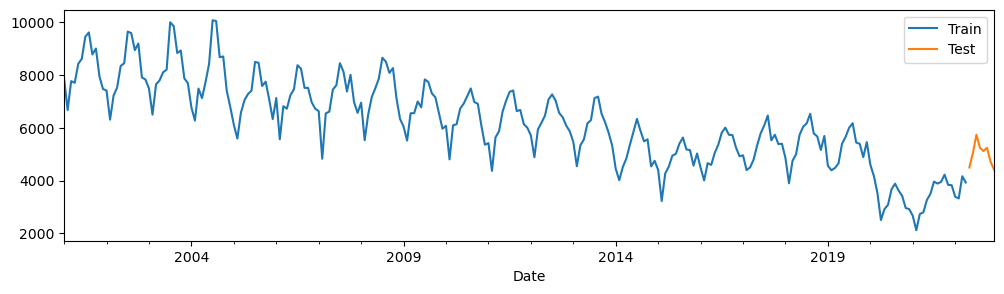

In [52]:
train, test = train_test_split(theft, test_size=.03) # adjusted for 6 months
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

#### Manual Model

In [53]:
# non-seasonal
p = 1
d = 1
q = 1
# seasonal
P = 1
D = 0
Q = 1
m = 12

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\gondr\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 639.684
- MSE = 468,399.219
- RMSE = 684.397
- R^2 = -1.775
- MAPE = 12.58%


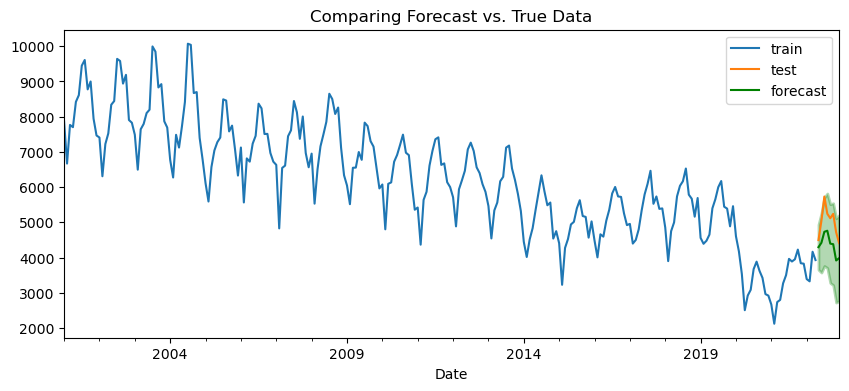

In [54]:
forecast_df = sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

In [55]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  256
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1851.804
Date:                          Fri, 03 Nov 2023   AIC                           3713.607
Time:                                  12:30:34   BIC                           3731.313
Sample:                              01-31-2001   HQIC                          3720.729
                                   - 04-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8483      0.043     19.841      0.000       0.764       0.932
ma.L1         -0.9842      0.016    -63.410      0.000      -1.015      -0.954
ar.S.L12       0.9713      0.010     96.029      0.000       0.951       0.991
ma.S.L12      -0.6606      0.049    -13.443      0.000      -0.757      -0.564
sigma2      1.065e+05   7608.206     13.993      0.000    9.16e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.06   Jarque-Bera (JB):                14.64
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.23
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

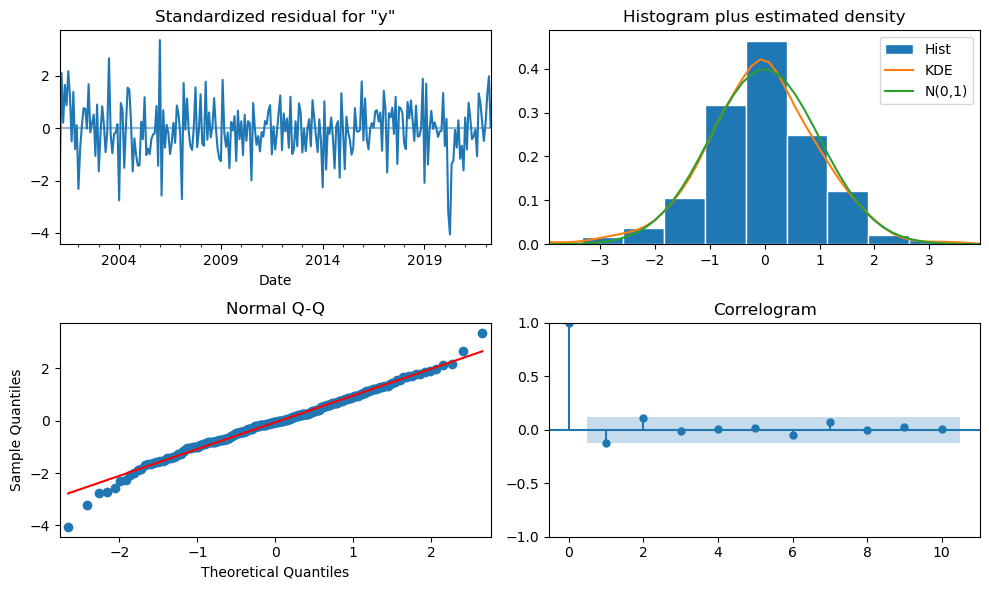

In [56]:
# diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

#### Auto Model

In [57]:
# auto_arima
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4019.421, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3762.983, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3884.995, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4017.573, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4019.622, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3745.392, Time=1.12 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3718.307, Time=2.53 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3716.132, Time=0.84 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3884.084, Time=0.29 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3715.035, Time=2.67 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3841.017, Time=1.13 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.12 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3726.948, Time=2.11 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 247.847
- MSE = 92,270.456
- RMSE = 303.761
- R^2 = 0.453
- MAPE = 4.79%


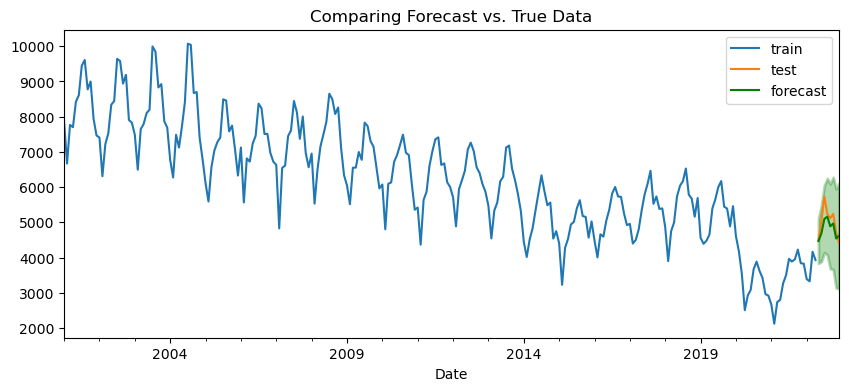

In [58]:
auto_sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order = auto_model.seasonal_order).fit()
forecast_df = auto_sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

In [59]:
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                     y   No. Observations:                  256
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1851.714
Date:                               Fri, 03 Nov 2023   AIC                           3713.428
Time:                                       12:31:28   BIC                           3731.135
Sample:                                   01-31-2001   HQIC                          3720.551
                                        - 04-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2256      0.046     -4.922      0.000      -0.315      -0.136
ar.S.L12       0.9773      0.008    116.901      0.000       0.961       0.994
ma.S.L12      -0.5763      0.059     -9.758      0.000      -0.692      -0.461
ma.S.L24      -0.1186      0.069     -1.728      0.084      -0.253       0.016
sigma2      1.043e+05   7423.783     14.051      0.000    8.98e+04    1.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                29.52
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.43
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

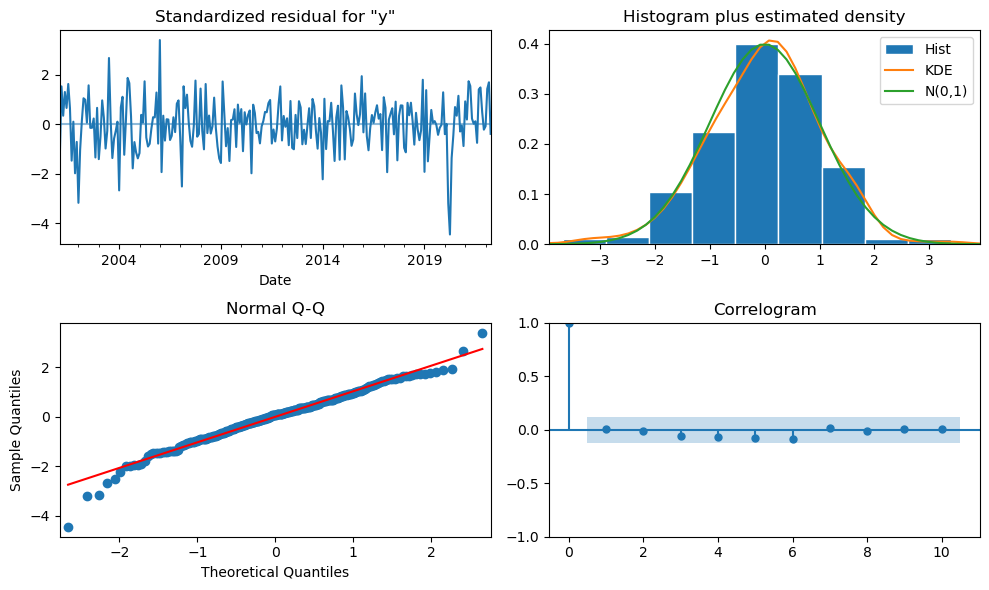

In [60]:
fig = auto_sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

**The auto_arima model 'ARIMA(1,1,0)(1,0,2)[12]' performs best in every metric.**

**I have selected this model as my final model.**

#### Forecast
Final Model: ***ARIMA(1,1,0)(1,0,2)[12]***

In [61]:
# defining final model
p = 1
d = 1 
q = 0 
P = 1 
D = 0 
Q = 2 
m = 12 

final_model = tsa.ARIMA(theft, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\gondr\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


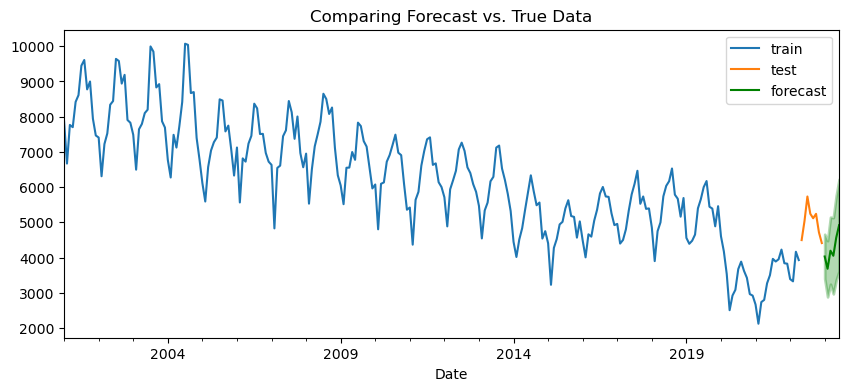

In [62]:
# future forecast
forecast_df  = final_model.get_forecast(6).summary_frame()
plot_forecast(train,test,forecast_df);

In [63]:
# raw count predicted net change
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
change = final_value - starting_value
print(f'Starting Value: {starting_value}')
print(f'Final Value: {final_value}')
print(f'Change: {change}')

Starting Value: 4031.3764192344343
Final Value: 4920.791857325684
Change: 889.4154380912496


In [64]:
# percent change
perc_change = (change / starting_value) * 100
perc_change

22.06232674894078

- The predicted net change in the number of thefts: **889**
  - Predicted percentage increase in thefts over the next 6 months: **22%**.

### Narcotics

#### Data

In [65]:
narc = ts[ts['Primary Type'] == 'NARCOTICS'].drop(columns=["ID","Description","Location Description","Arrest","Domestic","Beat","District","Ward","Latitude","Longitude","Holiday"])
narc.head()

,Primary Type
Date,
2001-01-01 01:00:00,NARCOTICS
2001-01-01 01:10:00,NARCOTICS
2001-01-01 01:10:00,NARCOTICS
2001-01-01 01:12:00,NARCOTICS
2001-01-01 01:20:00,NARCOTICS


In [66]:
narc.isna().sum()

Primary Type    0
dtype: int64

In [67]:
narc = narc.resample('M').size()
narc

Date
2001-01-31    4714
2001-02-28    4369
2001-03-31    4862
2001-04-30    4044
2001-05-31    4038
              ... 
2022-08-31     420
2022-09-30     379
2022-10-31     358
2022-11-30     339
2022-12-31     325
Freq: M, Length: 264, dtype: int64

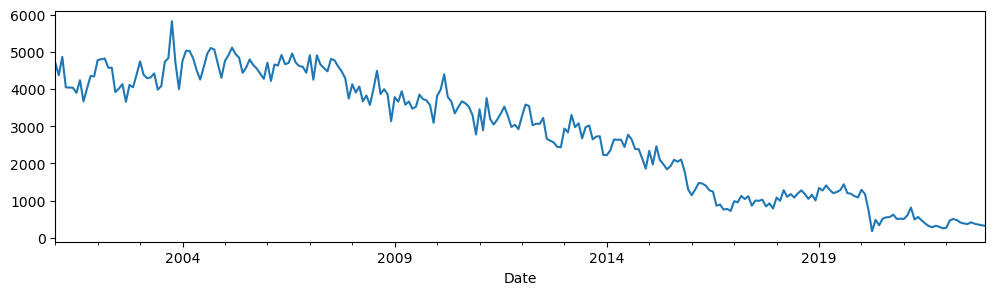

In [68]:
narc.plot();

#### Seasonality

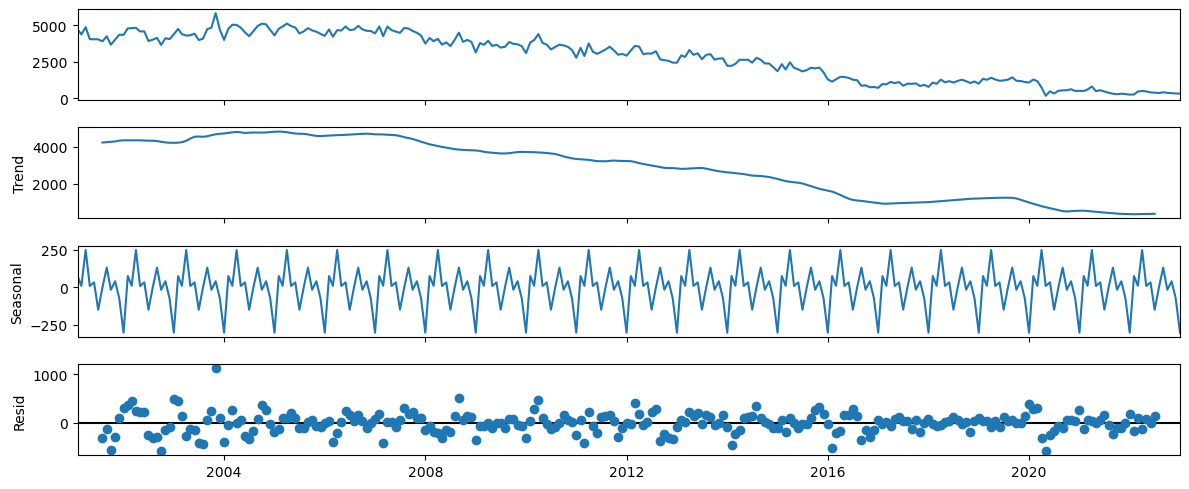

In [69]:
decomp = tsa.seasonal_decompose(narc)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [70]:
tmax = narc.max()
tmin = narc.min()
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
tper = seasonal_delta/(tmax-tmin) * 100

print(f"The seasonal component is {seasonal_delta} which is ~{tper:.2f}% of the variation in time series.")

The seasonal component is 550.6626984126984 which is ~9.76% of the variation in time series.


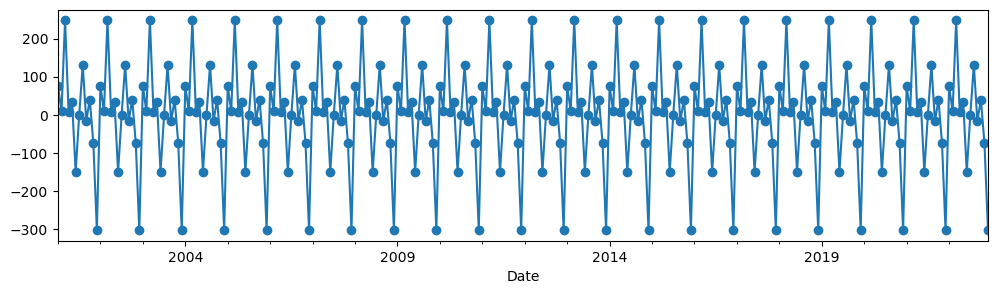

In [71]:
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

#### Model Order

In [72]:
# determine d
d = ndiffs(narc)
print (f'd = {d}')
# Determine D
D = nsdiffs(narc, m =12)
print(f'D = {D}')

d = 1
D = 0


In [73]:
narc_diff = narc.diff().dropna()

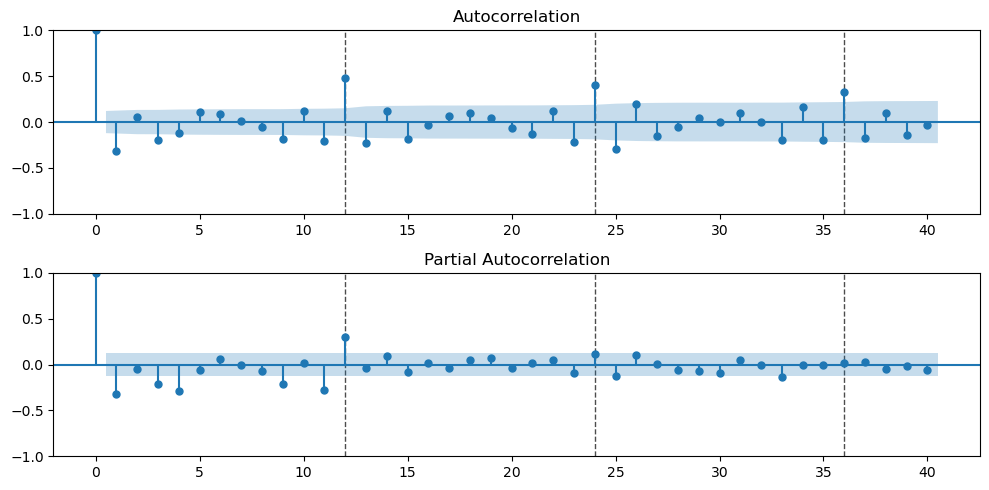

In [74]:
plot_acf_pacf(narc_diff, annotate_seas=True, m = 12);

Due to the sharp drop after lag 1 on both I will start with a (1,1,1)(1,0,1,12) model


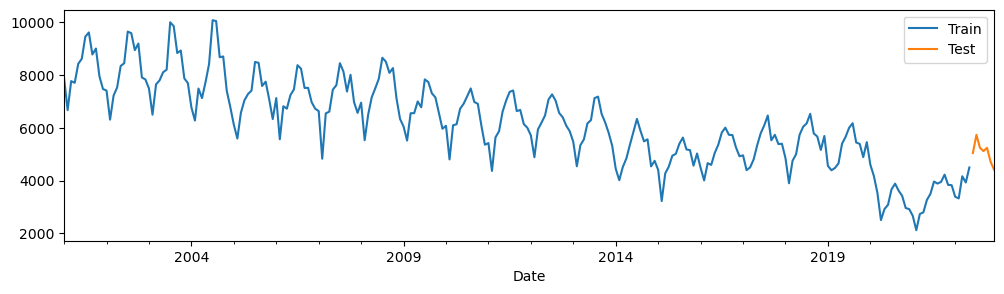

In [75]:
train, test = train_test_split(theft, test_size=.025) # adjusted for ~6 months
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

#### Manual Model

In [76]:
# non-seasonal
p = 1
d = 1
q = 1
# seasonal
P = 1
D = 0
Q = 1
m = 12

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 259.775
- MSE = 95,496.457
- RMSE = 309.025
- R^2 = 0.369
- MAPE = 5.03%


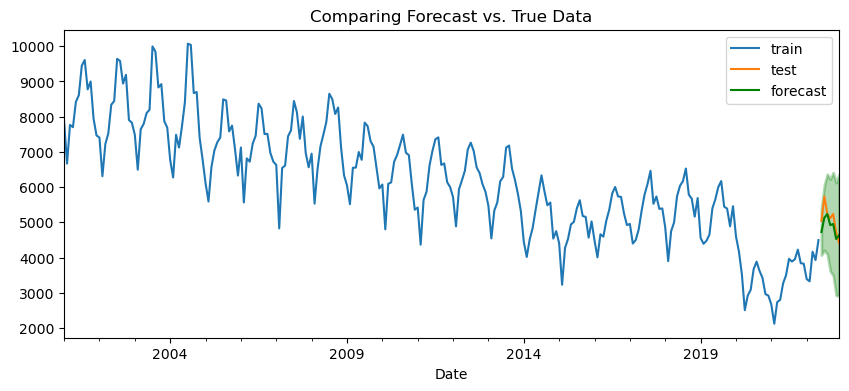

In [77]:
forecast_df = sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

In [78]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  257
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1867.097
Date:                          Fri, 03 Nov 2023   AIC                           3744.194
Time:                                  12:31:38   BIC                           3761.920
Sample:                              01-31-2001   HQIC                          3751.323
                                   - 05-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.191      5.222      0.000       0.623       1.372
ma.L1         -0.9988      0.164     -6.082      0.000      -1.321      -0.677
ar.S.L12       0.9777      0.007    141.265      0.000       0.964       0.991
ma.S.L12      -0.6686      0.043    -15.409      0.000      -0.754      -0.584
sigma2      1.115e+05   8182.016     13.622      0.000    9.54e+04    1.27e+05
===================================================================================
Ljung-Box (L1) (Q):                  11.59   Jarque-Bera (JB):                14.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.26
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

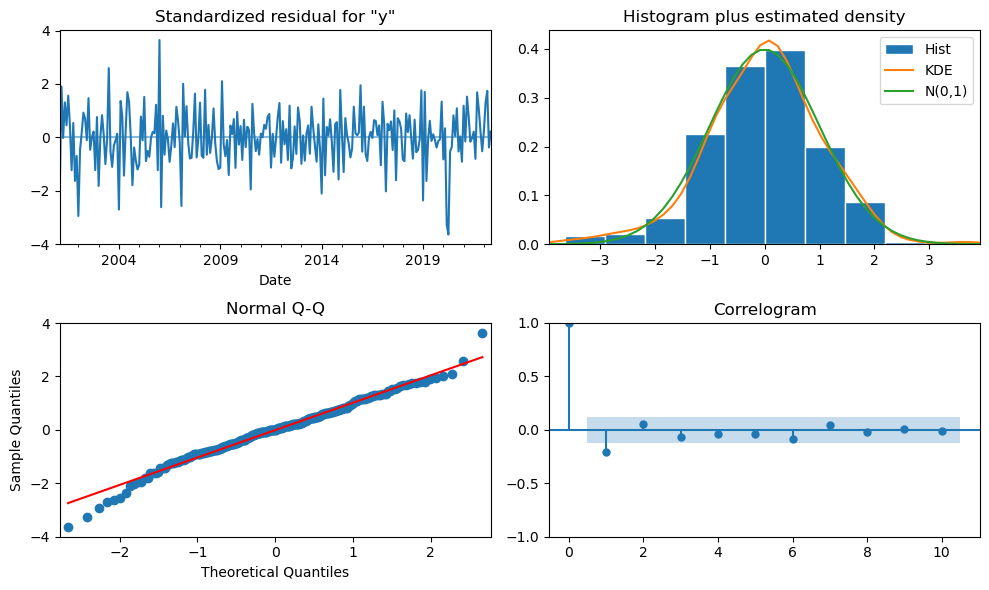

In [79]:
# diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

#### Auto Model

In [80]:
# auto_arima
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4035.004, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3776.765, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3899.479, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4033.116, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4035.150, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3759.236, Time=1.01 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3733.380, Time=3.00 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3729.441, Time=0.98 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3898.516, Time=0.36 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3728.426, Time=2.60 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3855.432, Time=1.21 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.94 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3740.474, Time=2.14 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 262.291
- MSE = 95,448.753
- RMSE = 308.948
- R^2 = 0.370
- MAPE = 5.07%


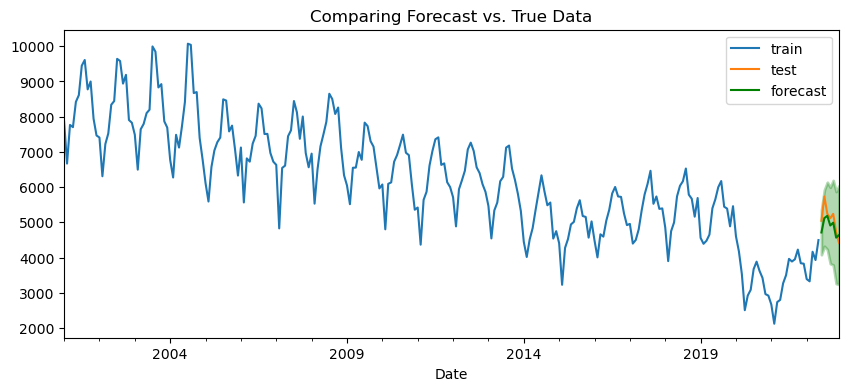

In [81]:
auto_sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order = auto_model.seasonal_order).fit()
forecast_df = auto_sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

In [82]:
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                     y   No. Observations:                  257
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1858.414
Date:                               Fri, 03 Nov 2023   AIC                           3726.827
Time:                                       12:32:30   BIC                           3744.553
Sample:                                   01-31-2001   HQIC                          3733.957
                                        - 05-31-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2258      0.046     -4.947      0.000      -0.315      -0.136
ar.S.L12       0.9774      0.008    117.934      0.000       0.961       0.994
ma.S.L12      -0.5764      0.059     -9.798      0.000      -0.692      -0.461
ma.S.L24      -0.1189      0.068     -1.738      0.082      -0.253       0.015
sigma2      1.039e+05   7358.957     14.116      0.000    8.95e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                30.29
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.44
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

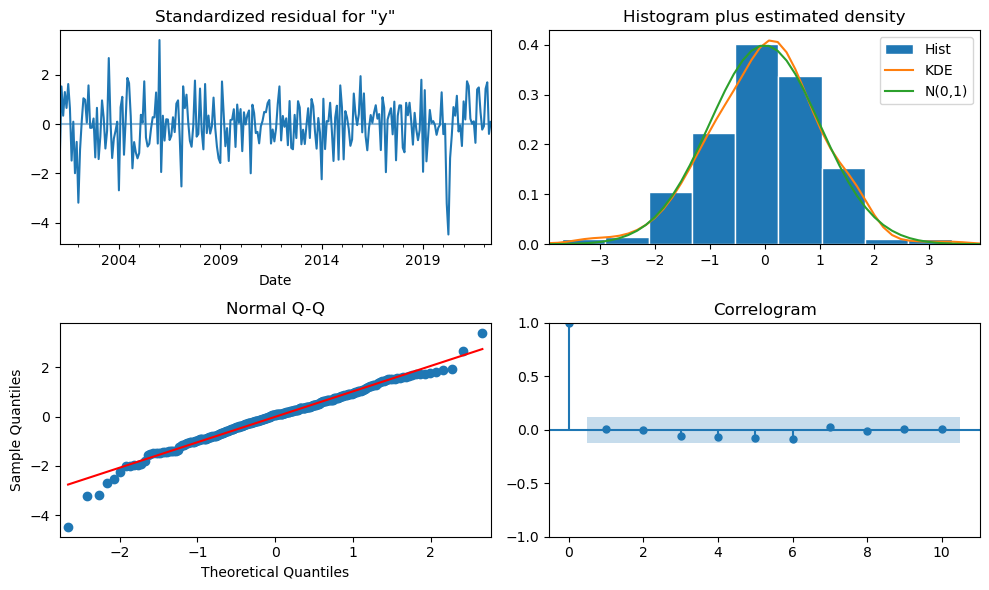

In [83]:
fig = auto_sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- The manual model has marginally better MAE, R2, and MAPE
  
- The auto model has marginally better MSE and RMSE

- Given the close nature of these results I am going to prioritize MAPE and select the manual model as my final model
  
- **Final Model:** ARIMA(1, 1, 1)(1, 0, 1, 12)	

#### Forecast
Final Model: **ARIMA(1,1,1)(1,0,1,12)**

In [84]:
# defining final model
p = 1
d = 1 
q = 1
P = 1 
D = 0 
Q = 1 
m = 12 

final_model = tsa.ARIMA(theft, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\gondr\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


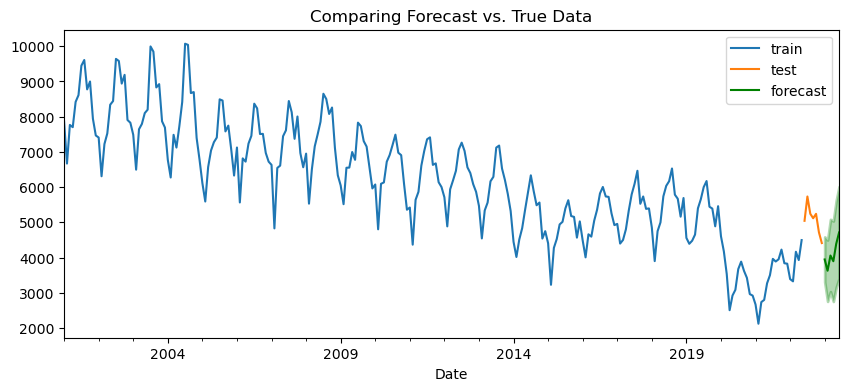

In [85]:
# future forecast
forecast_df  = final_model.get_forecast(6).summary_frame()
plot_forecast(train,test,forecast_df);

In [86]:
# raw count predicted net change
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
change = final_value - starting_value
print(f'Starting Value: {starting_value}')
print(f'Final Value: {final_value}')
print(f'Change: {change}')

Starting Value: 3947.205388525159
Final Value: 4714.362962651515
Change: 767.1575741263559


In [87]:
# percent change
perc_change = (change / starting_value) * 100
perc_change

19.43546125966853

- The predicted net change in the number of narcotic crimes: **767**

- Predicted percentage increase in narotic crimes over the next 6 months: **19%**


### Final Evaluation

##### Between theft and narcotics, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
- Theft is forecasted to have the highest monthly count at the end of the forecast.
##### Between theft and narcotics, which is forecasted to have the highest net change by the end of the forecast?
- At 889 crimes theft is predicted to have the highest net change.
##### Between theft and narcotics, which is forecasted to have the highest percent change by the end of the forecast?
- At a 22% increase, theft is predicted to have the highest percent change.

### Final Recommendations

#### Viz Prep

In [96]:
theft.head()

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
Freq: M, dtype: int64

In [91]:
narc.head()

Date
2001-01-31    4714
2001-02-28    4369
2001-03-31    4862
2001-04-30    4044
2001-05-31    4038
Freq: M, dtype: int64

In [107]:
fc = pd.concat([theft, narc], axis=1)
fc.head()

,0,1
Date,,
2001-01-31,7867,4714
2001-02-28,6669,4369
2001-03-31,7766,4862
2001-04-30,7702,4044
2001-05-31,8420,4038


In [109]:
fc.rename(columns={fc.columns[0]: 'Theft', fc.columns[1]: 'Narcotics'},inplace=True)
fc.head()

,Theft,Narcotics
Date,,
2001-01-31,7867,4714
2001-02-28,6669,4369
2001-03-31,7766,4862
2001-04-30,7702,4044
2001-05-31,8420,4038


In [132]:
X = fc.index
y1 = fc['Theft']
y2 = fc['Narcotics']

#### Recommendation

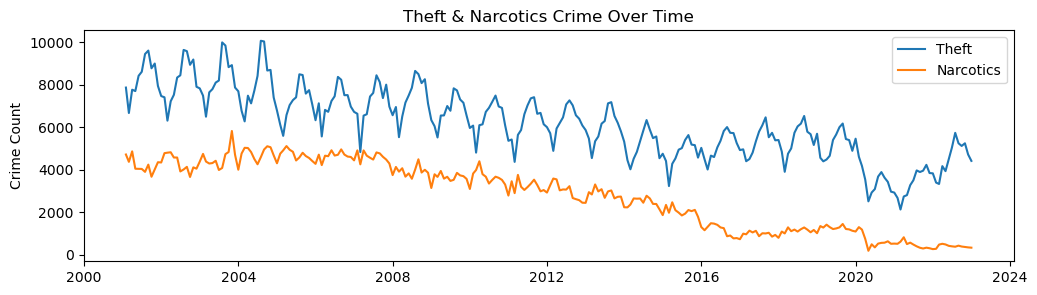

In [133]:
fig, ax = plt.subplots()
ax.plot(X, y1, label = "Theft")
ax.plot(X, y2, label = "Narcotics")
ax.legend()
ax.set(ylabel= "Crime Count", xlabel = "", title = "Theft & Narcotics Crime Over Time");

**Theft is clearly a more frequent problem than narcotics. The projected increase in theft over the next six months is 22%, marginally higher than narcotics at 19%. Given the higher baseline count theft is predicted to spike more. Absent other data (such as the efficacy of resources in preventing a particular crime) I would recommend a heavier portion of the resources be allocated to preventing theft.**